# <center> Data Science - LAB 3 - Reconocimiento de caracteres manuscritos

* Daniela Villamar (19086)
* Diego Crespo (19541)


## Importamos las librerías a utilizar

In [1]:
#importamos varias librerias usadas comúnmmente, completas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

#desde el paquete, importamos una librería para ver los colores
from skimage import color

from time import time

#importamos funciones específicas de cada librería, que serán utilizadas más adelante
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Model, Sequential, load_model, save_model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

import warnings
warnings.filterwarnings('ignore')

### Cargamos la data de MNIST desde keras

Dado que el dataset es uno comúnmnente usado en Python, decidimos cargarlo directamente desde MNIST. Esta es una base de datos de dígitos escritos a mano, disponible en (http://yann.lecun.com/exdb/mnist/). Tiene un set de entrenamiento con 60,000 ejemplos y uno de prueba con 10,000 ejemplos.

In [2]:
#cargamos la data de entrenamienot y la data de prueba desde mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

### Visualización de Datos

In [3]:
#para verificar que este correcto, observamos las formas de cada dataset
print("Imágenes: ", Xtrain.shape)
print("Clasificación: ", Ytrain.shape)
print("Imágenes Prueba: ", Xtest.shape)
print("Clasificación: ", Ytest.shape)

Imágenes:  (60000, 28, 28)
Clasificación:  (60000,)
Imágenes Prueba:  (10000, 28, 28)
Clasificación:  (10000,)


A partir de los resultados anteriores, puede obsevarse que, en efecto, existen 60,000 datos dentro del set de entrenamienot y 10,000 dentro del de prueba. Además, vemos que tienen 28 x 28 columnas.

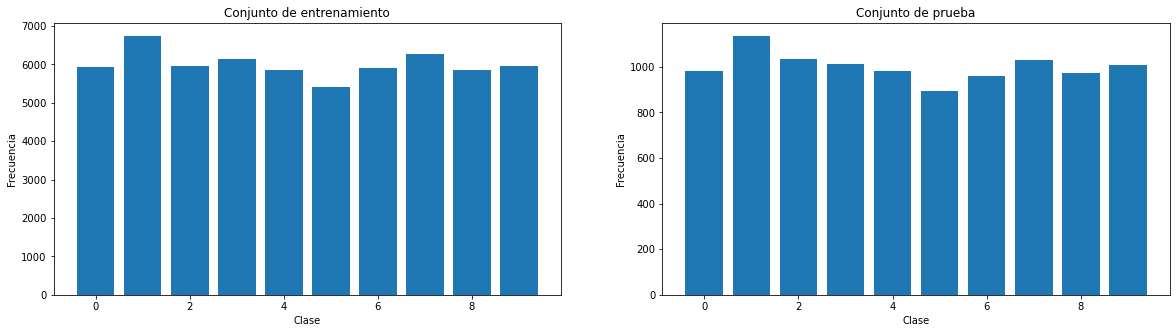

In [4]:
# graficamos los datos, para estudiarlos y buscar datos atípicos
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
#plt.hist(train_labels[:], bins=10)
h = np.histogram(Ytrain, bins=10)
plt.bar(range(0,10), h[0])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Conjunto de entrenamiento')

plt.subplot(1,2,2)
#plt.hist(test_labels[:], bins=10)
h = np.histogram(Ytest, bins=10)
plt.bar(range(0,10), h[0])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Conjunto de prueba')

plt.show()

A partir de los gráficos de barras anteriores, puede observarse que dentro del conjunto de entrenamienot, si bien algunos dígitos tienen cuna cantidad considerable de registros más que otros, en general, es estable. Dentro de estos resalta el dígito 1, que tiene aproximadamente 1500 registros más que el 5. 

Por otro lado, en el conjunto de prueba, puede observarse un sesgo mayor. Al igual que en el conjunto de entrenamiento, sobresale el dígito 1 y el 5, por ser los que tienen la mayor y menor cantidad de frecuencias, respectivamente. Sin embargo, es importante mencionar que los datos tienen la misma proporción que muestran en el conjutno de entrenamiento.

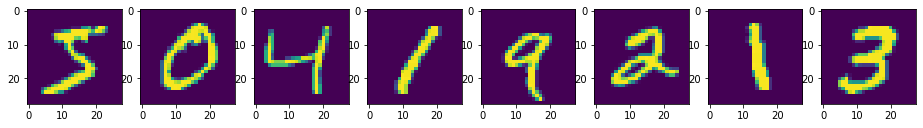

In [5]:
#Esto solo es para ver que tiene la data adentro 
# graficamos cada uno de los dígitos
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 10, 1)
plt.imshow(Xtrain[0,:,:])
plt.subplot(1, 10, 2)
plt.imshow(Xtrain[1,:,:])
plt.subplot(1, 10, 3)
plt.imshow(Xtrain[2,:,:])
plt.subplot(1, 10, 4)
plt.imshow(Xtrain[3,:,:])
plt.subplot(1, 10, 5)
plt.imshow(Xtrain[4,:,:])
plt.subplot(1, 10, 6)
plt.imshow(Xtrain[5,:,:])
plt.subplot(1, 10, 7)
plt.imshow(Xtrain[6,:,:])
plt.subplot(1, 10, 8)
plt.imshow(Xtrain[7,:,:])

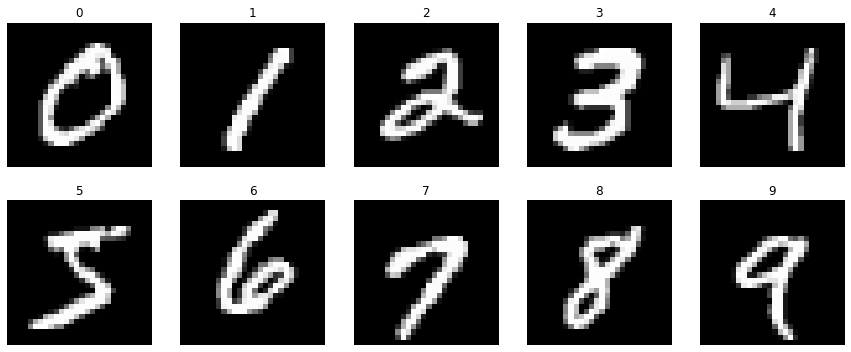

In [6]:
# Ejemplos de imágenes para cada clase

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(Ytrain).index(i)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.title(Ytrain[idx])
    plt.axis('off')   
plt.show()

Cada imágen tiene 28 pixeles de altura y 28 pixeles de ancho haciendo un total de 784 pixeles. 

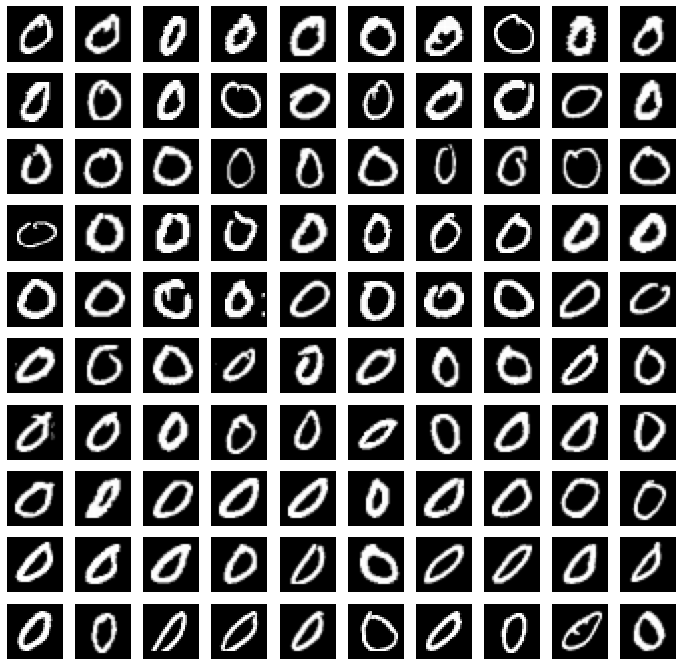

In [7]:
#observamos cómo se ven todos los dígitos 0

#fijamos el tamaño de las imágenes
nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

#definimos el dígito a estudiar
digit = 0
Indexes = np.where(Ytrain==digit)[0][:numIm]

#creamos el gráfico
plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

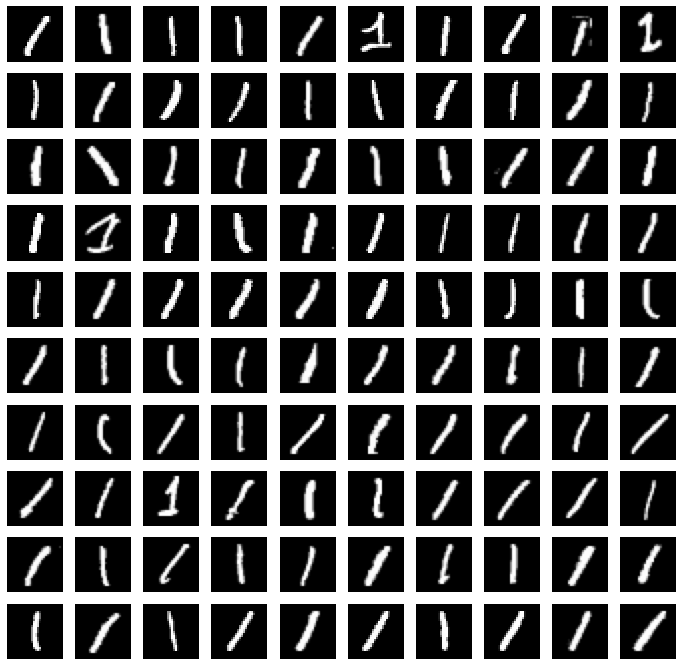

In [8]:
#observamos cómo se ven todos los dígitos 1

#fijamos el tamaño de las imágenes
nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

#definimos el dígito a estudiar
digit = 1
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

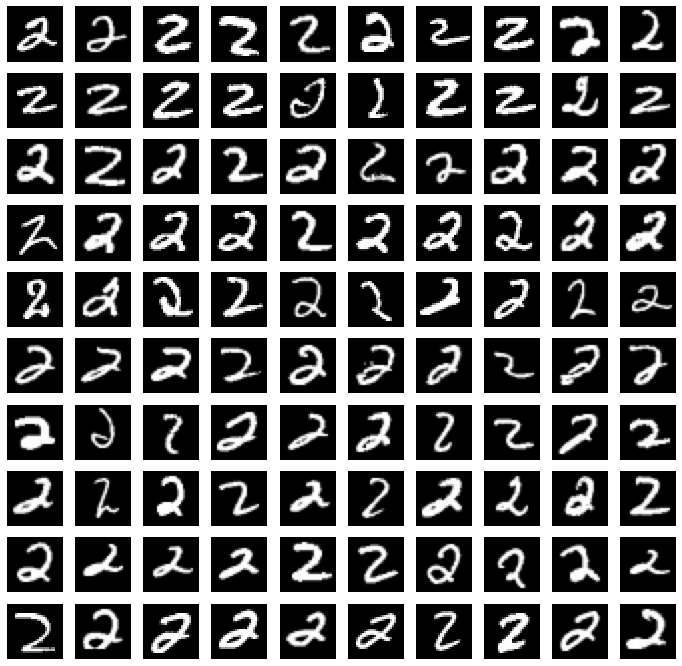

In [9]:
#observamos cómo se ven todos los dígitos 2

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 2
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

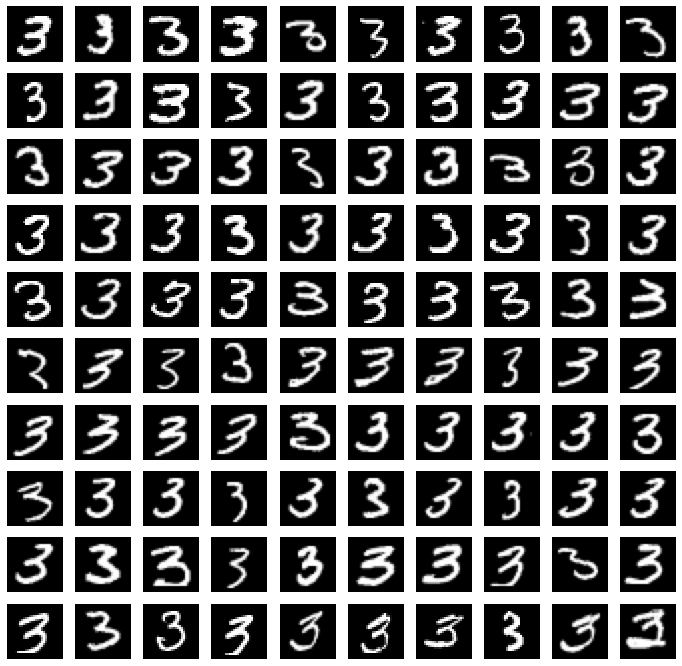

In [10]:
#observamos cómo se ven todos los dígitos 3

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 3
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

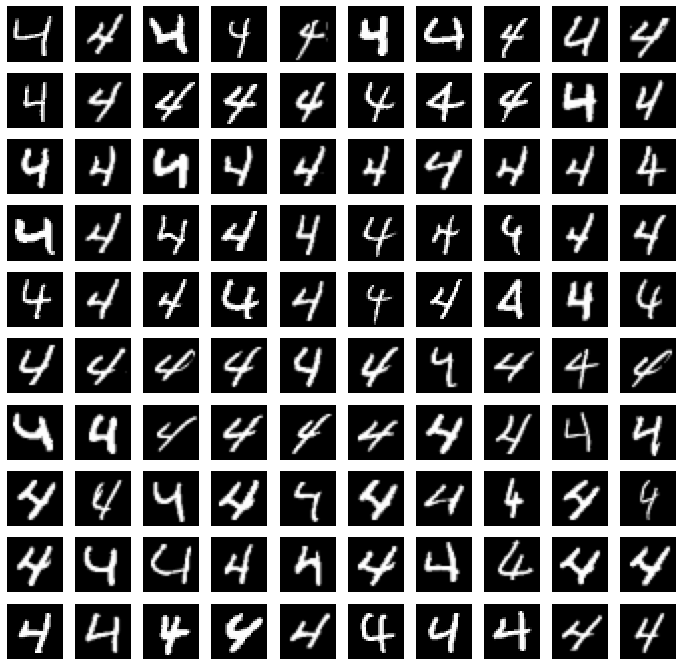

In [11]:
#observamos cómo se ven todos los dígitos 4
nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 4
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

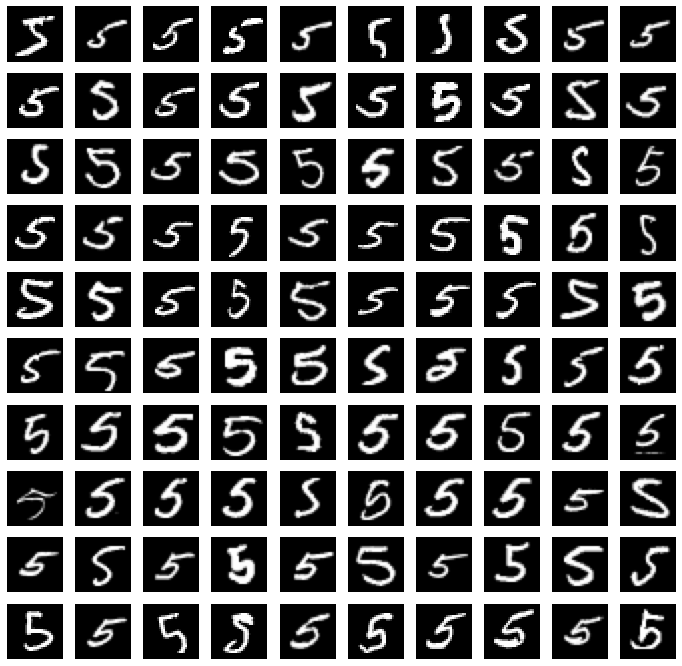

In [12]:
#observamos cómo se ven todos los dígitos 5

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 5
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

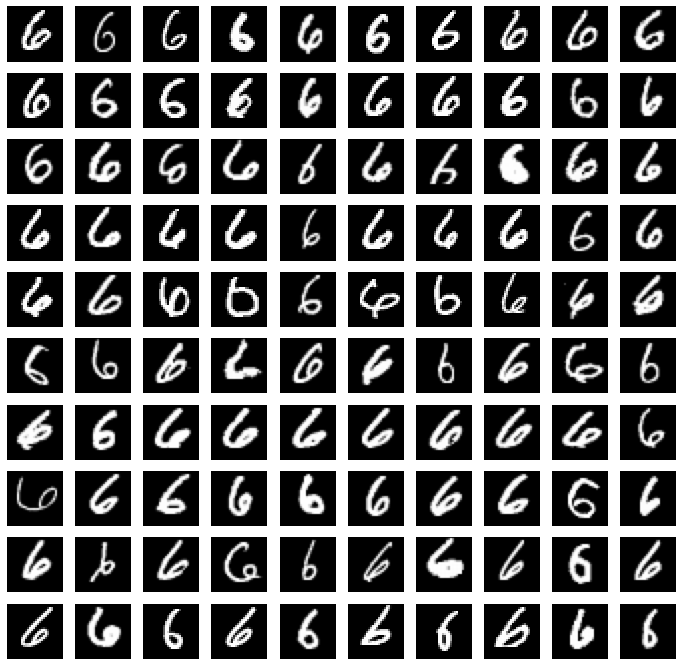

In [13]:
#observamos cómo se ven todos los dígitos 6

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 6
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

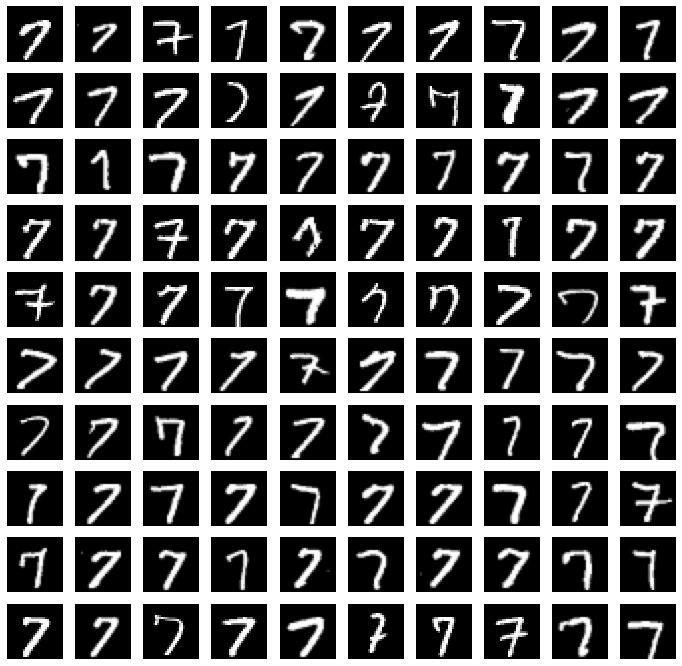

In [14]:
#observamos cómo se ven todos los dígitos 7

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 7
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

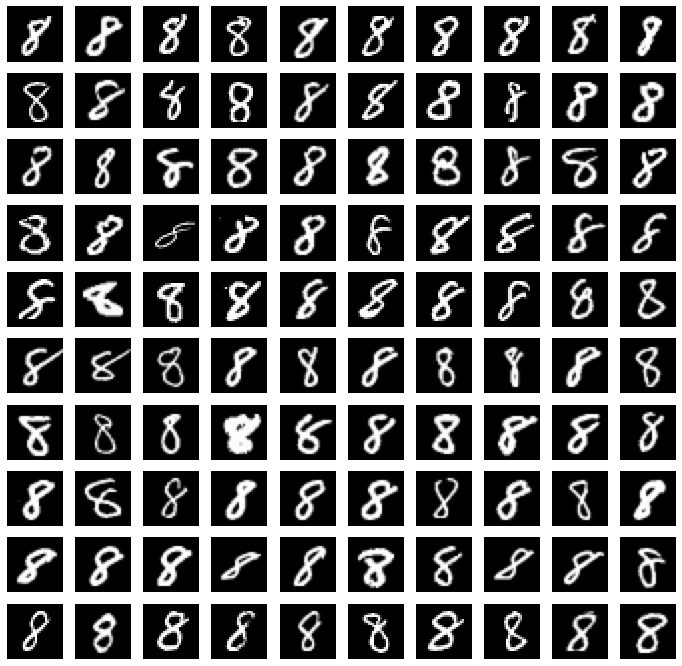

In [15]:
#observamos cómo se ven todos los dígitos 8

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 8
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

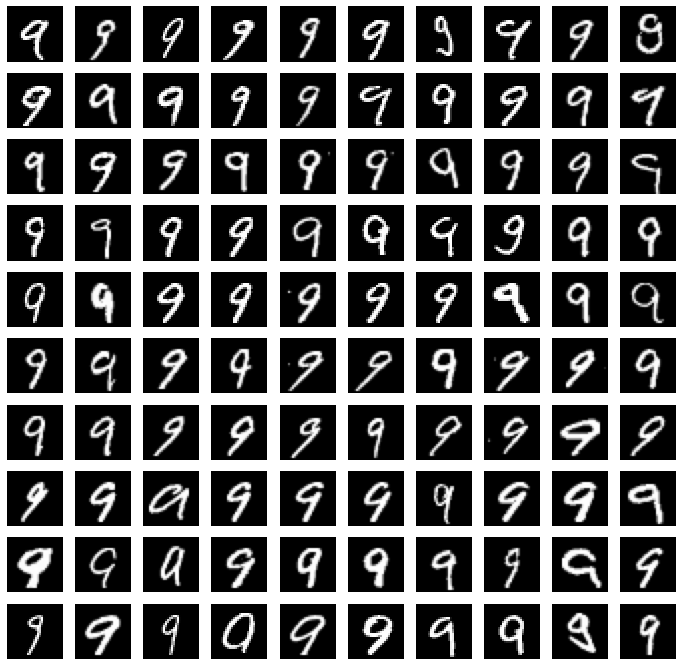

In [16]:
#observamos cómo se ven todos los dígitos 9

nrowsIm = 10
ncolsIm = 10
numIm = nrowsIm*ncolsIm

digit = 9
Indexes = np.where(Ytrain==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i, idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(Xtrain[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

A partir de los gráficos anteriores, podemos observar que los únicos dígitos que difieren significativamente en su escritura son 1, 2 y 7. Por su parte, 4 muestra una o dos variantes, pero nada tan marcado como los anteriores. Esto es positivo, puesto que se observa una manera homogénea de presentar los dígitos y presume un resultado positivo posterior al estudio.

### Normalización de la Data

In [17]:
# nueva forma y normalización
Xtrain = Xtrain.reshape((-1, 28, 28, 1))
Xtrain = Xtrain.astype('float32') / 255.


Xtest = Xtest.reshape((-1, 28, 28, 1))
Xtest = Xtest.astype('float32') / 255.

In [18]:
#pasamos a variables categóricas
train = to_categorical(Ytrain)
test  = to_categorical(Ytest)

In [19]:
#verificamos que los cambios se hayan realizado
print('Modified data shapes:')
print('X train:', Xtrain.shape, 'Y train:', train.shape)
print('X test:', Xtest.shape, 'Y test:', test.shape)

data = Xtrain.shape[1:]

print('')
print('data shape:', data)

Modified data shapes:
X train: (60000, 28, 28, 1) Y train: (60000, 10)
X test: (10000, 28, 28, 1) Y test: (10000, 10)

data shape: (28, 28, 1)


## Modelo de CNN (convolutional Neural Network)

In [20]:
# definimos el modelo CNN como una función

def ConvolutionalNN(input_shape):
    # toma el argumento de la función y la transforma a un input
    I = Input(shape=input_shape, name='input')
    
    # seleccionamos por características
    X = Conv2D(32, kernel_size=(3,3), activation='relu', name='conv1')(I)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool1')(X)
    X = Dropout(0.25, name='dropout1')(X)
    X = Conv2D(32, kernel_size=(3,3), activation='relu', name='conv2')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool2')(X)
    X = Dropout(0.25, name='dropout2')(X)
    X = Conv2D(64, kernel_size=(3,3), activation='relu', name='conv3')(X)
    
    # modificamos la cola del modelo
    X = Flatten(name='flatten')(X)
    X = Dense(64, activation='relu', name='dense')(X)
    X = Dense(10, activation='softmax', name='classifier')(X)
    model = Model(I, X, name='CNN-model')
    #el valor de retorno de la función es el modelo
    return model

In [21]:
if 'convnet' in globals(): del convnet
convnet = None

convnet = ConvolutionalNN(data)

In [22]:
#observamos el resultado de la red
convnet.summary()

Model: "CNN-model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 32)        9248      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
dropout2 (Dropout)           (None, 5, 5, 32)          0 

In [23]:
alpha = 1e-3 #RMSprop
opt = optimizers.RMSprop(lr=alpha)
convnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#realizamos el modelo, mientras contamos el tiempo en completarse
tic = time()
history = convnet.fit(Xtrain, train, epochs=16, batch_size=128, validation_split=0.1666)
toc = time()
print('total training time:', toc-tic, 'seconds')

Epoch 1/16
391/391 [==============================] - 14s 33ms/step - loss: 0.7092 - accuracy: 0.7702 - val_loss: 0.1013 - val_accuracy: 0.9694
Epoch 2/16
391/391 [==============================] - 12s 32ms/step - loss: 0.1224 - accuracy: 0.9622 - val_loss: 0.0634 - val_accuracy: 0.9817
Epoch 3/16
391/391 [==============================] - 12s 31ms/step - loss: 0.0718 - accuracy: 0.9768 - val_loss: 0.0507 - val_accuracy: 0.9852
Epoch 4/16
391/391 [==============================] - 12s 31ms/step - loss: 0.0574 - accuracy: 0.9814 - val_loss: 0.0406 - val_accuracy: 0.9892
Epoch 5/16
391/391 [==============================] - 12s 32ms/step - loss: 0.0486 - accuracy: 0.9837 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 6/16
391/391 [==============================] - 12s 32ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0346 - val_accuracy: 0.9904
Epoch 7/16
391/391 [==============================] - 13s 32ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0340 - val_accuracy:

In [25]:
#determinamos una llave para graficar luego
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

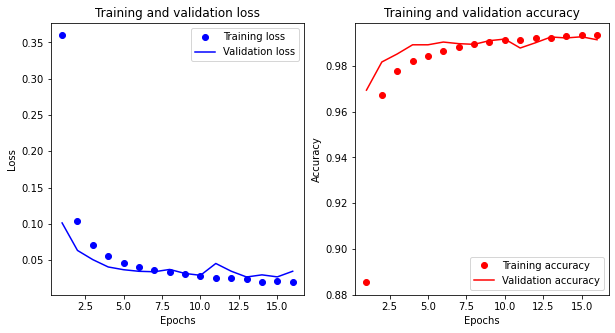

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

De los gráficos anteriores, es posible observar que la pérdida de información en la validación y elaboración de modelos se va reduciendo conforme aumentan las corridas del modelo. De forma proporcional a esto, la precisión obtenida va en aumento conforme las corridas crecen, lo que indica un aumento en la precisión de predicción del modelo.

In [27]:
# compute predictions (inference process)
predictions4 = convnet.predict(Xtest)

# from predictions compute most probable class
pred4 = np.argmax(predictions4, 1)
test = np.argmax(test, 1)

In [28]:
print(accuracy_score(test, pred4))

0.993


Confrimando lo observado en las gráficas, puede concluirse que el modelo presenta un 99.3 % de precisión, lo que es sumamente alto e ideal, por lo que el modelo CNN es valioso para el dataset en cuestión.

In [29]:
print(classification_report(test, pred4))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



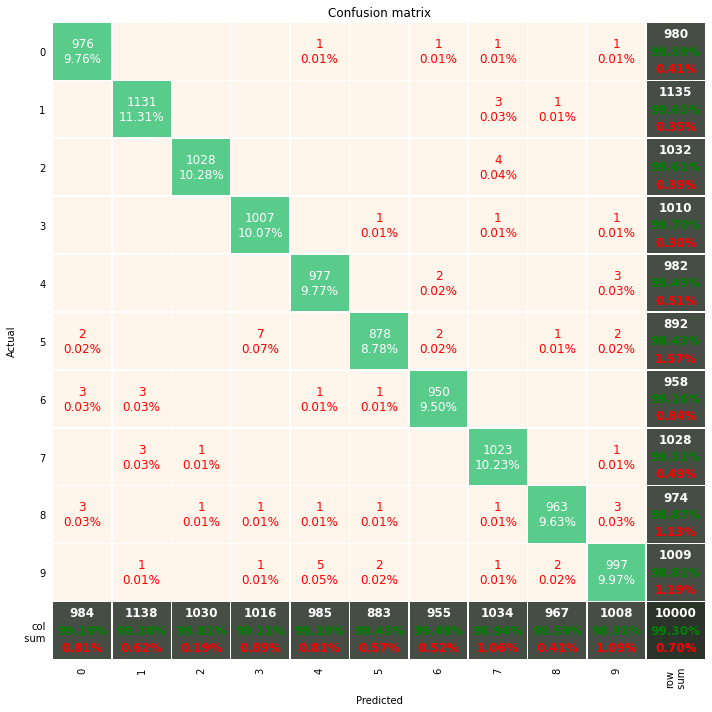

In [30]:
CM2 = confusion_matrix(test, pred4)

# plot confusion matrix
cf2 = pd.DataFrame(CM2)
pretty_plot_confusion_matrix(cf2, annot=True, pred_val_axis='x', figsize=(10,10), fz=12)

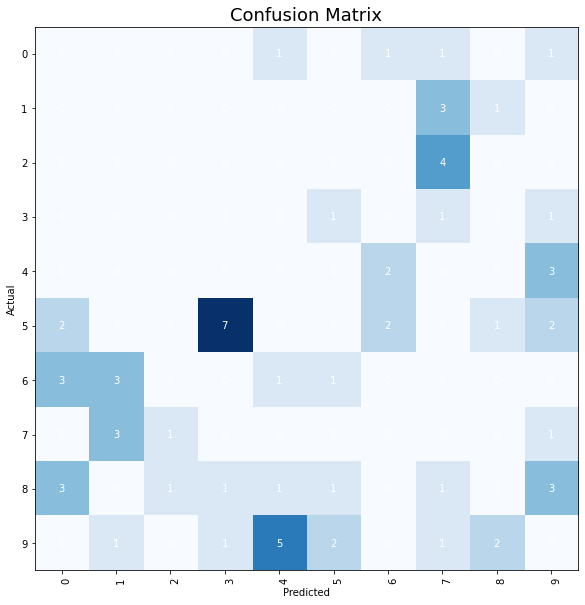

0

In [31]:
# second plot
PlotMatrix(CM2, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix', fz=15)

De la matriz de confusión, puede verse la alta precisión del modelo para la predicción de valores utilizando el modelo en cuestión. Es importante mencionar que en valores con distintas escrituras, como 4, 5, 8 y 9 se tiene incluso un alto rendimiento, a pesar de las diferencias que puedan presentarse.

## Modelo NN (Neural Network)

In [32]:
# cargar la interfaz a la base de datos que viene con Keras
from tensorflow.keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Raw data shapes:')
print('X train:', train_images.shape, 'Y train:', train_labels.shape)
print('X test:', test_images.shape, 'Y test:', test_labels.shape)

# pre-procesamiento de los datos
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255.

# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

Raw data shapes:
X train: (60000, 28, 28) Y train: (60000,)
X test: (10000, 28, 28) Y test: (10000,)


In [33]:
#observamos los resultados y la forma de los datos luego de modificarlo
print('Modified data shapes:')
print('X train:', train_images.shape, 'Y train:', train_labels.shape)
print('X test:', test_images.shape, 'Y test:', test_labels.shape)

#modificamos la forma
data_shape = train_images.shape[1:]

#verificamos los cambios
print('')
print('data shape:', data_shape)

Modified data shapes:
X train: (60000, 784) Y train: (60000, 10)
X test: (10000, 784) Y test: (10000, 10)

data shape: (784,)


In [34]:
#definimos el modelo como una función, que trabaja sobre la forma del dataset

def NNmulticapa(input_shape):
    #toma el argumento como input
    I = Input(shape=input_shape, name='input')
    
    X = Dense(512, activation='relu', name='dense1')(I)
    X = Dense(256, activation='relu', name='dense2')(X)
    X = Dense(128, activation='relu', name='dense3')(X)
    X = Dense(10, activation='softmax', name='classifier')(X)

    #genera el modelo a partir de los datos obtenidos
    model = Model(I, X, name='NN-Multicapa')

    # devuelve el modelo 
    return model

In [35]:
if 'network2' in globals(): del network2
network2 = None

network2 = NNmulticapa(data_shape)

In [36]:
network2.summary()

Model: "NN-Multicapa"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
dense2 (Dense)               (None, 256)               131328    
_________________________________________________________________
dense3 (Dense)               (None, 128)               32896     
_________________________________________________________________
classifier (Dense)           (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
